In [6]:
import pymatgen as mg
import os, re
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])

In [9]:


comp = mg.Composition("Fe2O3")
anon_formula = comp.anonymized_formula
# We need to convert the formula to the dict form used in the database.
anon_formula = {m.group(1): int(m.group(2)) 
                for m in re.finditer(r"([A-Z]+)(\d+)", anon_formula)}

data = rester.query({"anonymous_formula": anon_formula}, 
                 properties=["task_id", "pretty_formula", "structure"])
print(len(data))  #Should show ~600 data.

610


In [25]:
comp = mg.Composition("Fe3O4")
anon_formula = comp.anonymized_formula
# We need to convert the formula to the dict form used in the database.
anon_formula = {m.group(1): int(m.group(2)) 
                for m in re.finditer(r"([A-Z]+)(\d+)", anon_formula)}
print(anon_formula)
data = rester.query({"anonymous_formula": anon_formula}, 
                 properties=["task_id", "pretty_formula", "structure"])
print(len(data))  #Should show ~600 data.

{'A': 3, 'B': 4}
273


In [18]:
comp = mg.Composition("LaWN3")
anon_formula = comp.anonymized_formula
anon_formula

'ABC3'

In [26]:
type(anon_formula)

dict

In [45]:
comp = mg.Composition("Fe2O3")
anon_formula = comp.anonymized_formula
print(type(anon_formula))
print(anon_formula)
# We need to convert the formula to the dict form used in the database.
anon_formula = {m.group(1): int(m.group(2)) 
                for m in re.finditer(r"([A-Z]+)(\d+)", anon_formula)}
print(anon_formula)
# data = rester.query({"anonymous_formula": anon_formula}, 
#                  properties=["task_id", "pretty_formula", "structure"])
# print(len(data))  #Should show ~600 data.



<class 'str'>
A2B3
{'A': 2, 'B': 3}


In [41]:
comp = mg.Composition("Mn2O3")
anon_formula = comp.anonymized_formula
# We need to convert the formula to the dict form used in the database.
anon_formula = {m.group(1): int(m.group(2)) 
                for m in re.finditer(r"([A-Z]+)(\d+)", anon_formula)}
print(anon_formula)
data = rester.query({"anonymous_formula": anon_formula}, 
                 properties=["task_id", "pretty_formula", "structure"])
print(len(data))  #Should show ~600 data.

{'A': 2, 'B': 3}
610


In [47]:
comp = mg.Composition("Fe2O3")
anon_formula = comp.anonymized_formula
print(type(anon_formula))
print(anon_formula)

<class 'str'>
A2B3


In [52]:
a, b, c, d = anon_formula.split()

ValueError: not enough values to unpack (expected 4, got 1)

In [80]:

import re

# s = raw_input('a2b2')
s = 'Fe2S2O3'
m = re.match(r"([a-zA-Z]+)([0-9]+)",s)
print(m.group(0))
print(m.group(1))
print(m.group(2))

n = re.match(r"([a-zA-Z]+)([0-9]+)([a-zA-Z]+)([0-9]+)",s)

print(n.group(0))
print(n.group(0))

Fe2
Fe
2
Fe2S2
Fe2S2


In [81]:
n.group(0)[0]

'F'

In [67]:
comp = mg.Composition("Fe2O3")
anon_formula = comp.anonymized_formula
# We need to convert the formula to the dict form used in the database.
anon_formula = {m.group(1): int(m.group(2)) 
                for m in re.finditer(r"([a-zA-Z]+)([0-9]+)", anon_formula)}
print(anon_formula)
data = rester.query({"anonymous_formula": anon_formula}, 
                 properties=["task_id", "pretty_formula", "structure"])
print(len(data))  #Should show ~600 data.

{'A': 2, 'B': 3}
610


In [1]:
import pymatgen as mg
import os, re
# rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])

with mg.MPRester(os.environ['PMG_MAPI_KEY']) as m:

    #Structure for material id
    structure = m.get_structure_by_material_id("mp-1234")

    #Dos for material id
    dos = m.get_dos_by_material_id("
                                   ")

    #Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-1234")
    
    #To get a list of data for all entries having formula Fe2O3
    data = m.get_data("Fe2O3")
    print(data[0])
    
    #To get the energies of all entries having formula Fe2O3
#     energies = m.get_data("Fe2O3", "energy")
    
    


{'energy': -262.93588696, 'energy_per_atom': -6.573397174, 'volume': 412.52125239361567, 'formation_energy_per_atom': -1.742722074750001, 'nsites': 40, 'unit_cell_formula': {'Fe': 16.0, 'O': 24.0}, 'pretty_formula': 'Fe2O3', 'is_hubbard': True, 'elements': ['Fe', 'O'], 'nelements': 2, 'e_above_hull': 0.14344305300000038, 'hubbards': {'Fe': 5.3, 'O': 0.0}, 'is_compatible': True, 'spacegroup': {'source': 'spglib', 'symbol': 'P1', 'number': 1, 'point_group': '1', 'crystal_system': 'triclinic', 'hall': 'P 1'}, 'task_ids': ['mp-777192'], 'band_gap': 0.9422000000000001, 'density': 5.142396689406187, 'icsd_id': None, 'icsd_ids': [], 'cif': "# generated using pymatgen\ndata_Fe2O3\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   5.14257520\n_cell_length_b   5.38325856\n_cell_length_c   14.90158199\n_cell_angle_alpha   90.39095785\n_cell_angle_beta   90.01411824\n_cell_angle_gamma   89.83420415\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Fe2O3\n_chemical_formula_sum

## Print volume/f.u. for the requested material

In [13]:
import pymatgen as mg
import os, re
# rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])

with mg.MPRester(os.environ['PMG_MAPI_KEY']) as m:

    #Structure for material id
    structure = m.get_structure_by_material_id("mp-10932")
    density = structure.density # Returns the density in units of g/cc (cc, cubic centimeter)
#     print(structure.volume)
#     print(len(structure.sites[:]))
#     print(type(structure.formula))
#     print(type(structure.composition))
    composition = structure.composition
    reduced_composition = composition.reduced_composition
    number_of_fu = composition.num_atoms/reduced_composition.num_atoms
    volume_fu = structure.volume/number_of_fu
    print(volume_fu) # print volume per formula unit
    print(density) # Returns the density in units of g/cc

IndexError: list index out of range

In [98]:
# set1 = 'mp-1190-20180417'
new_set = {x.replace('-20180417', '') for x in mpid['ID']}
print(new_set)


{'mp-8453', 'mp-22987', 'mp-23072', 'mp-20194', 'mp-28066', 'mp-12903', 'mp-10760', 'mp-2604', 'mp-8751', 'mp-286', 'mp-756361', 'mp-23058', 'mp-1779', 'mp-753173', 'mp-2605', 'mp-581833', 'mp-31454', 'mp-10695', 'mp-9250', 'mp-12902', 'mp-1315', 'mp-4824', 'mp-2176', 'mp-2172', 'mp-2691', 'mp-27985', 'mp-13033', 'mp-23023', 'mp-27439', 'mp-924129', 'mp-10322', 'mp-1253', 'mp-7787', 'mp-675230', 'mp-406', 'mp-961685', 'mp-7173', 'mp-10074', 'mp-7950', 'mp-470', 'mp-10621', 'mp-16363', 'mp-9124', 'mp-3551', 'mp-862832', 'mp-10932', 'mp-2490', 'mp-9437', 'mp-7100', 'mp-30847', 'mp-28065', 'mp-23068', 'mp-676360', 'mp-252', 'mp-643', 'mp-27823', 'mp-856', 'mp-3104', 'mp-754212', 'mp-23025', 'mp-23856', 'mp-8799', 'mp-1672', 'mp-12904', 'mp-7599', 'mp-755336', 'mp-1415', 'mp-1500', 'mp-675199', 'mp-8756', 'mp-22939', 'mp-730', 'mp-1820', 'mp-754969', 'mp-12558', 'mp-23074', 'mp-1342', 'mp-10623', 'mp-1541', 'mp-37906', 'mp-961682', 'mp-2030', 'mp-19886', 'mp-5967', 'mp-1519', 'mp-1216', 'm

In [12]:
import pymatgen as mg
import os, re
import pandas as pd
mpid = pd.read_csv('./mpid-only-temp.csv', delim_whitespace=True)
mpid['volume_fu'], mpid['density'] = 1,2
print(mpid.head(3))

mpid = mpid.set_index(mpid['ID'])
print(mpid.head(3))
mpid.loc['mp-1190-20180417', ['volume_fu']] = 3.5
print(mpid)

"""
The content of mpid-only-temp.csv is as follows
        ID
0       mp-1190-20180417
1       mp-1216-20180417
2       mp-1253-20180417
"""

                 ID  volume_fu  density
0  mp-1190-20180417          1        2
1  mp-1216-20180417          1        2
2  mp-1253-20180417          1        2
                                ID  volume_fu  density
ID                                                    
mp-1190-20180417  mp-1190-20180417          1        2
mp-1216-20180417  mp-1216-20180417          1        2
mp-1253-20180417  mp-1253-20180417          1        2
                                ID  volume_fu  density
ID                                                    
mp-1190-20180417  mp-1190-20180417        3.5        2
mp-1216-20180417  mp-1216-20180417        1.0        2
mp-1253-20180417  mp-1253-20180417        1.0        2


In [14]:
import pymatgen as mg
import os, re
import pandas as pd
mpid = pd.read_csv('./mpid-only-temp.csv', delim_whitespace=True)
mpid['volume_fu'], mpid['density'] = 1,1
mpid = mpid.set_index(mpid['ID']) # set the ID column as asl the index
mpid.drop('mp-10932-20180417',inplace=True)
for i in mpid['ID']:
    id_trim = i.replace('-20180417', '')
#     print(id_trim)
    with mg.MPRester(os.environ['PMG_MAPI_KEY']) as m:
        structure = m.get_structure_by_material_id(id_trim)
        density = structure.density # Returns the density in units of g/cc (cc, cubic centimeter)
        density = float(density) # throw the unit
#         print(type(density))
        composition = structure.composition
        reduced_composition = composition.reduced_composition
        number_of_fu = composition.num_atoms/reduced_composition.num_atoms
        volume_fu = structure.volume/number_of_fu
        mpid.loc[i, ['volume_fu']]  = volume_fu
        mpid.loc[i, ['density']]  = density
        print(id_trim+"", volume_fu, density) # print volume per formula unit
        
print(mpid)

mp-1190 47.3376454287 5.064264571986021
mp-1216 26.7770706054 11.722988986519702
mp-1253 74.7411336984 4.805292475139997
                                ID  volume_fu    density
ID                                                      
mp-1190-20180417  mp-1190-20180417  47.337645   5.064265
mp-1216-20180417  mp-1216-20180417  26.777071  11.722989
mp-1253-20180417  mp-1253-20180417  74.741134   4.805292


In [53]:
len(structure.sites[:])

6

In [57]:
fu = structure.formula
print(type(fu))

<class 'str'>


In [102]:
import pymatgen as mg
import os, re
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])

results = rester.query("N", ['energy'])
print(results)

mp_entries = m.get_entries_in_chemsys(["Li", "N"])
print(mp_entries.st)

# with mg.MPRester(os.environ['PMG_MAPI_KEY']) as m:

#     # Get all energies of materials with formula "*2O".
#     results = m.query("*2O", ['energy'])

#     # Get the formulas and energies of materials with materials_id mp-1234
#     # or with formula FeO.
#     results = m.query("FeO mp-1234", ['pretty_formula', 'energy'])

# #     # Get all compounds of the form ABO3
# #     results = m.query("**O3", ['pretty_formula', 'energy'])


[{'energy': -12.49473715}, {'energy': -66.6138121}, {'energy': -132.81667588}, {'energy': -6.24620528}, {'energy': -33.26626098}, {'energy': -27.31995683}, {'energy': -66.61534328}, {'energy': -33.22108186}, {'energy': -14.58223165}]
[ComputedEntry mp-135 - Li1
Energy = -1.9089
Correction = 0.0000
Parameters:
run_type = GGA
is_hubbard = False
pseudo_potential = {'labels': ['Li_sv'], 'pot_type': 'paw', 'functional': 'pbe'}
hubbards = {}
potcar_symbols = ['pbe Li_sv']
oxide_type = None
Data:
oxide_type = None, ComputedEntry mp-10173 - Li2
Energy = -3.8111
Correction = 0.0000
Parameters:
run_type = GGA
is_hubbard = False
pseudo_potential = {'labels': ['Li_sv'], 'pot_type': 'paw', 'functional': 'pbe'}
hubbards = {}
potcar_symbols = ['pbe Li_sv']
oxide_type = None
Data:
oxide_type = None, ComputedEntry mp-567337 - Li8
Energy = -15.2464
Correction = 0.0000
Parameters:
run_type = GGA
is_hubbard = False
pseudo_potential = {'labels': ['Li_sv'], 'pot_type': 'paw', 'functional': 'pbe'}
hubbards =

In [103]:
type(mp_entries)

list

In [114]:
mp_entries[0]

ComputedEntry mp-135 - Li1
Energy = -1.9089
Correction = 0.0000
Parameters:
run_type = GGA
is_hubbard = False
pseudo_potential = {'labels': ['Li_sv'], 'pot_type': 'paw', 'functional': 'pbe'}
hubbards = {}
potcar_symbols = ['pbe Li_sv']
oxide_type = None
Data:
oxide_type = None

# Query methods

There are three kinds of queries:

1. Formula, e.g., "Fe2O3", "*TiO2“
2. Chemical systems, e.g., "Sr-Ti-O", "*-Fe-O"
3. Materials ID, e.g., "mp-199"

The MPRester automatically detects what kind of query is being made. Also, for formulas and chemical systems, wildcards are supported with a \*. That means *2O will yield a list of the following formula results:

B2O, Xe2O, Li2O ...



In [123]:
import pymatgen as mg
import os, re
from pprint import pprint
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])
# or we can just use
# rester = mg.MPRester()


# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places: 
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard

#The following query returns all structures in the Materials Project with formula "Fe2O3"
pprint(n.get_data("NaCl", prop="structure"))

[{'material_id': 'mp-22862',
  'structure': Structure Summary
Lattice
    abc : 4.0246351157711695 4.0246351145167107 4.0246351200000001
 angles : 59.999999954931127 59.999999965241919 60.000000013971373
 volume : 46.096137758208265
      A : 3.4854362499999998 0.0 2.0123175600000001
      B : 1.16181208 3.2861008100000002 2.0123175600000001
      C : 0.0 0.0 4.0246351200000001
PeriodicSite: Na (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cl (2.3236, 1.6431, 4.0246) [0.5000, 0.5000, 0.5000]},
 {'material_id': 'mp-22851',
  'structure': Structure Summary
Lattice
    abc : 3.5044562500000001 3.5044562500000001 3.5044562500000001
 angles : 90.0 90.0 90.0
 volume : 43.038975786715604
      A : 3.5044562500000001 0.0 0.0
      B : 0.0 3.5044562500000001 0.0
      C : 0.0 0.0 3.5044562500000001
PeriodicSite: Na (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cl (1.7522, 1.7522, 1.7522) [0.5000, 0.5000, 0.5000]}]


In [2]:
import pymatgen as mg
import os, re
from pprint import pprint
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])
# or we can just use
# rester = mg.MPRester()


# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places: 
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard

pprint(rester.get_data("*3O4", prop="pretty_formula"))

[{'material_id': 'mp-1605', 'pretty_formula': 'Ag3O4'},
 {'material_id': 'mp-18748', 'pretty_formula': 'Co3O4'},
 {'material_id': 'mp-772696', 'pretty_formula': 'Cr3O4'},
 {'material_id': 'mp-650112', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-18731', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-705416', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-715811', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-715438', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-612405', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-715558', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-714989', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-716052', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-541907', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-31770', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-19306', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-542433', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp-715275', 'pretty_formula': 'Fe3O4'},
 {'material_id': 'mp

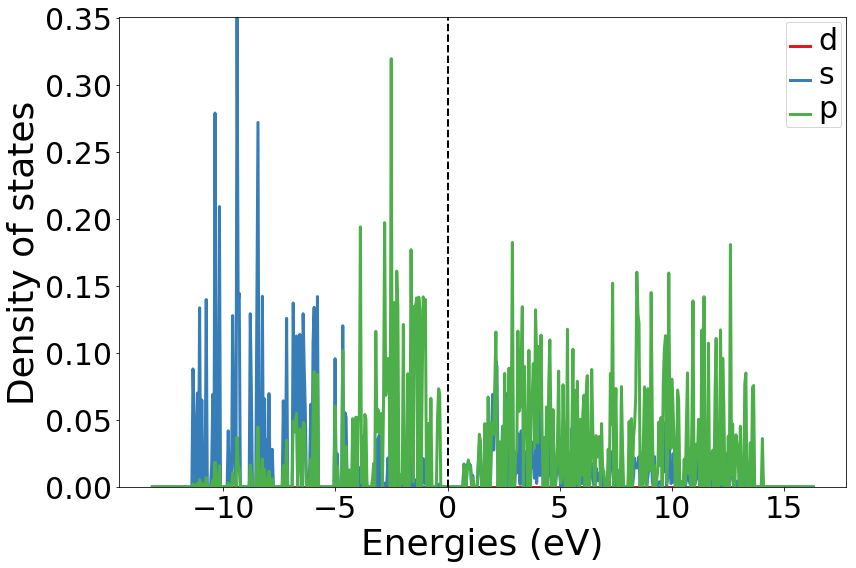

In [5]:
%matplotlib inline

import pymatgen as mg
import os, re
from pprint import pprint
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])


# or we can just use
# rester = mg.MPRester()


# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places: 
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard

dos = rester.get_dos_by_material_id('mp-149')
pdos = dos.get_spd_dos()
dos_plotter = DosPlotter()
dos_plotter.add_dos_dict(pdos)
dos_plotter.show()


# dos = m.get_dos_by_material_id("mp-19017")
# bs = m.get_bandstructure_by_material_id("mp-19017")

# from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter


# dos_plotter = DosPlotter()
# dos_plotter.add_dos_dict(dos.get_spd_dos())
# dos_plotter.show()

# bs_plotter = BSPlotter(bs)
# bs_plotter.show()

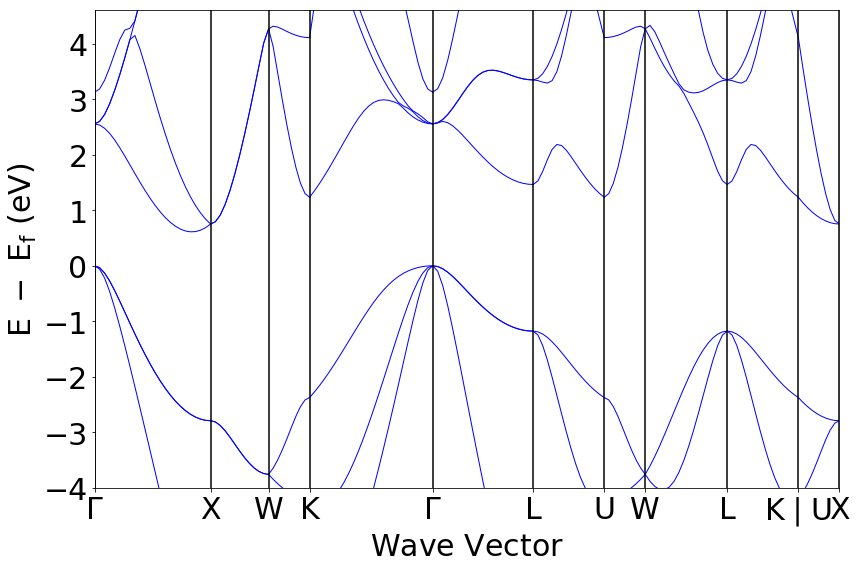

In [7]:
bs = rester.get_bandstructure_by_material_id('mp-149')
bs_plotter = BSPlotter(bs)
bs_plotter.show()

In [27]:
%matplotlib inline

import pymatgen as mg
import os, re
from pprint import pprint
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])


# or we can just use
# rester = mg.MPRester()


# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places: 
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard

data = rester.get_data('mp-149')

x =  rester.get_stability(data[0])

MPRestError: Expecting ',' delimiter: line 1 column 2033 (char 2032)

In [20]:
data[0]

{u'band_gap': 0.6118999999999994,
 u'cif': u"# generated using pymatgen\ndata_Si\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   3.86697462\n_cell_length_b   3.86697462\n_cell_length_c   3.86697462\n_cell_angle_alpha   60.00000003\n_cell_angle_beta   60.00000002\n_cell_angle_gamma   60.00000002\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   Si\n_chemical_formula_sum   Si2\n_cell_volume   40.8882918885\n_cell_formula_units_Z   2\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Si  Si1  1  0.875000  0.875000  0.875000  1\n  Si  Si2  1  0.125000  0.125000  0.125000  1\n",
 u'density': 2.281194137085888,
 u'e_above_hull': 0,
 u'elasticity': {u'G_Reuss': 59.0,
  u'G_VRH': 61.0,
  u'G_Voigt': 63.0,
  u'G_Voigt_Reuss_Hill': 61.0,
  u'K_Reuss': 83.0,
  u'K_VRH':

In [24]:
data1 = rester.get_stability()

TypeError: get_stability() takes exactly 2 arguments (1 given)

In [1]:
import pymatgen as mg
import os, re
from pprint import pprint
rester = mg.MPRester(os.environ['PMG_MAPI_KEY'])
# or we can just use
# rester = mg.MPRester()


# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places: 
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard

pprint(rester.get_data("PbTe", prop="pretty_formula"))

[{'material_id': 'mp-20943', 'pretty_formula': 'TePb'},
 {'material_id': 'mp-19717', 'pretty_formula': 'TePb'},
 {'material_id': 'mp-685022', 'pretty_formula': 'TePb'}]
